In [535]:
#Fitting & Clustering
#Name: Namith Ravindranath
#Student ID: 2304081

In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
data_path = 'shopping_trends.csv'
df = pd.read_csv(data_path)

# Overview of the dataset
df.head(15)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


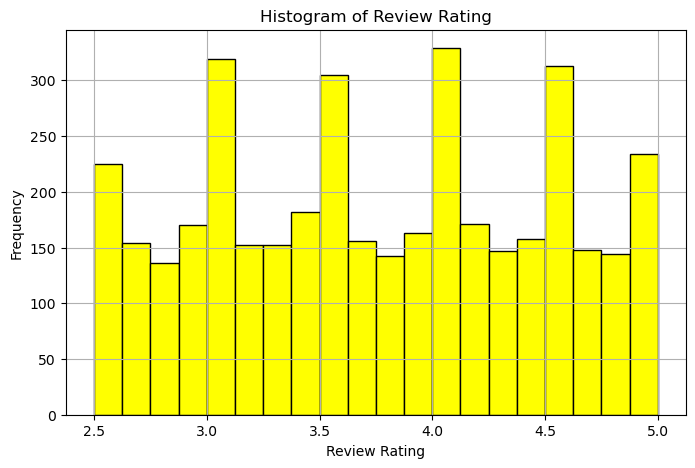

<Figure size 640x480 with 0 Axes>

In [464]:
#Histogram
def plot_histogram(df, column):
    plt.figure(figsize=(8, 5))
    df[column].hist(bins=20, color='Yellow', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(df, 'Review Rating')

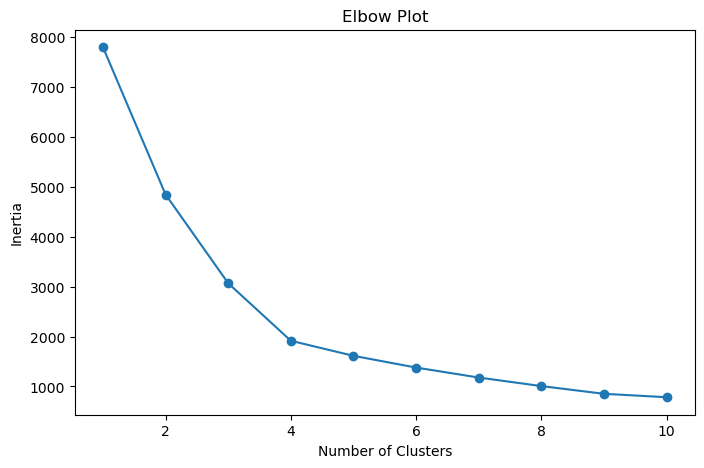

<Figure size 640x480 with 0 Axes>

In [465]:
#Elbow Graph
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def plot_elbow(df, features):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])
    
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow(df, ['Age', 'Purchase Amount (USD)'])

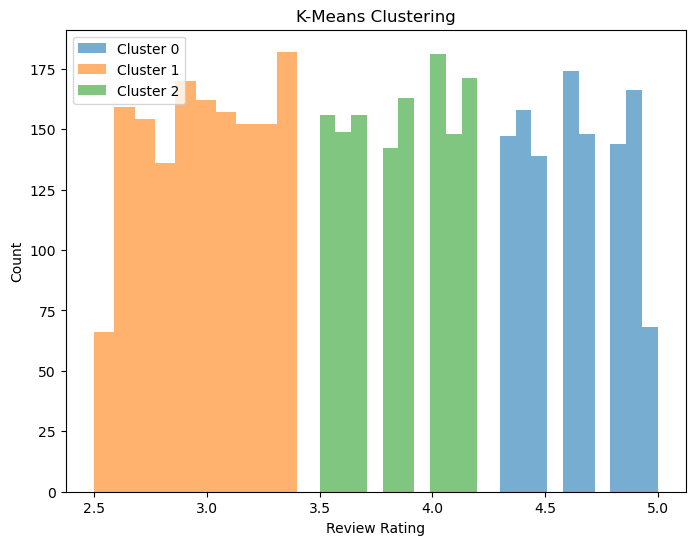

<Figure size 640x480 with 0 Axes>

In [466]:
#K Means clustering

def plot_clusters(df, features, n_clusters=3):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_features)
    
    if len(features) == 1:
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.hist(cluster_data[features[0]], bins=10, alpha=0.6, label=f'Cluster {cluster}')
        plt.xlabel(features[0])
        plt.ylabel('Count')
    else:
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {cluster}')
        plt.xlabel(features[0])
        plt.ylabel(features[1])

    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

plot_clusters(df, ['Review Rating'], n_clusters=3)

Mean Squared Error: 723.30
R-squared: -0.29


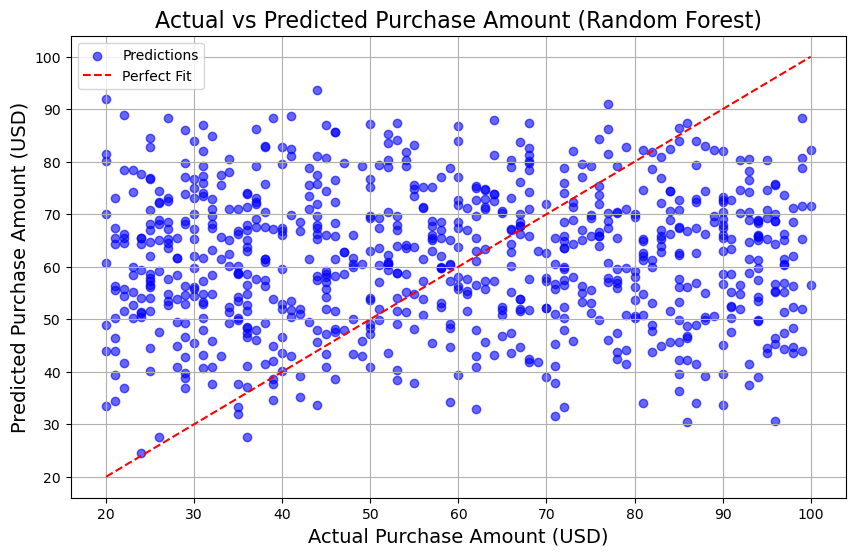

<Figure size 640x480 with 0 Axes>

In [467]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

X = df[['Age', 'Review Rating', 'Category_encoded']]
y = df['Purchase Amount (USD)'] 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fittind the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')  # Perfect prediction line
plt.title('Actual vs Predicted Purchase Amount (Random Forest)', fontsize=16)
plt.xlabel('Actual Purchase Amount (USD)', fontsize=14)
plt.ylabel('Predicted Purchase Amount (USD)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

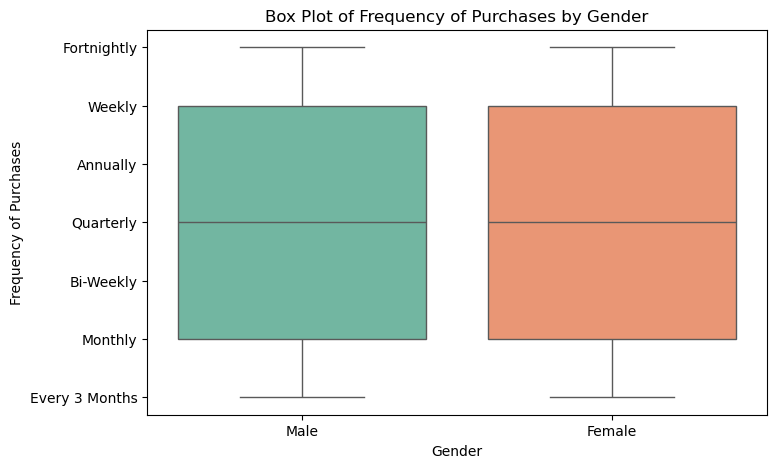

<Figure size 640x480 with 0 Axes>

In [468]:
#Box plot
def plot_boxplot(df, column, group_by=None):
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    if group_by and group_by not in df.columns:
        raise ValueError(f"Column '{group_by}' not found in DataFrame.")
    
    plt.figure(figsize=(8, 5))
    
    if group_by:
        sns.boxplot(x=group_by, y=column, data=df, hue=group_by, palette='Set2')
        plt.title(f'Box Plot of {column} by {group_by}')
        plt.xlabel(group_by)
    else:
        sns.boxplot(y=column, data=df, palette='Set2')
        plt.title(f'Box Plot of {column}')
    
    plt.ylabel(column)
    plt.show()

plot_boxplot(df, column='Frequency of Purchases', group_by='Gender') 
plt.savefig("box.png")

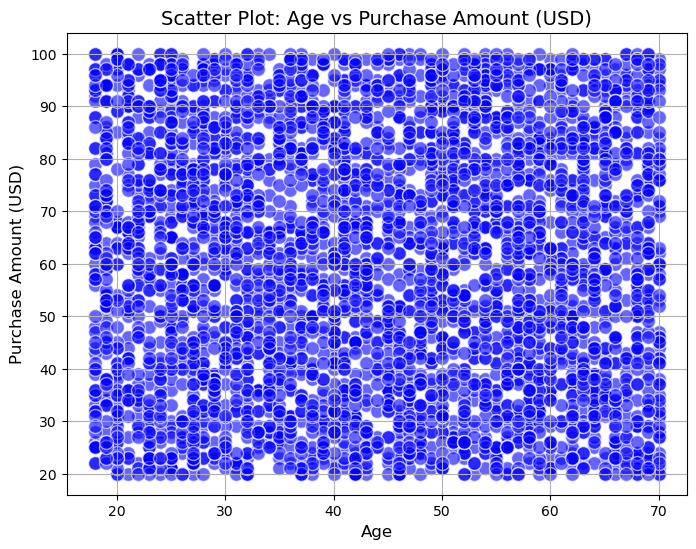

<Figure size 640x480 with 0 Axes>

In [469]:
#Scatter plot
def scatter_plot(df, x_column, y_column):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.6, edgecolors='w', s=100, c='blue')
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=14)
    plt.grid(True)
    plt.show()
scatter_plot(df, 'Age', 'Purchase Amount (USD)') 
plt.savefig("Scatter9.png")

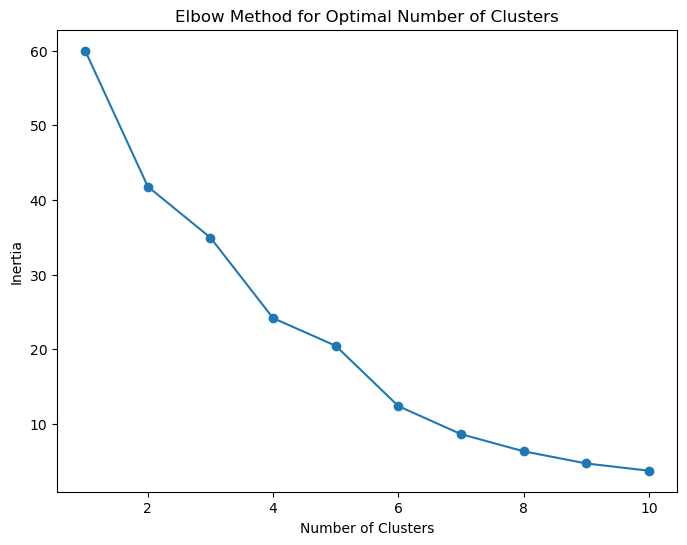

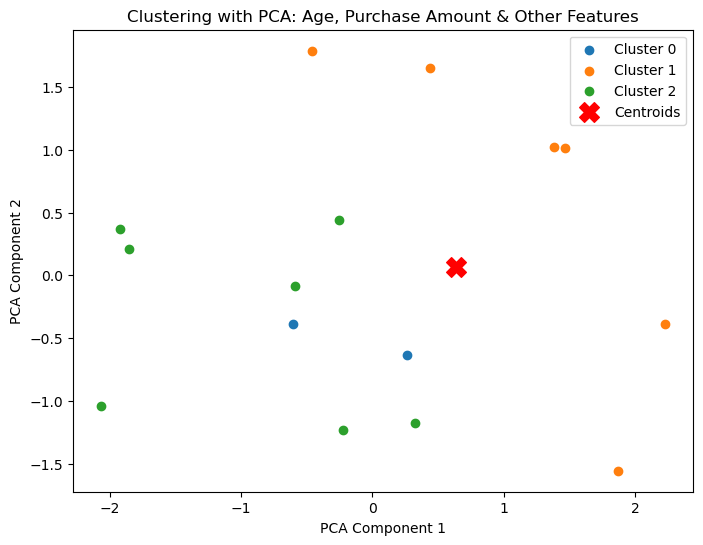

In [527]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'Age': [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64],
    'Purchase Amount (USD)': [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 34, 68, 72, 51, 53],
    'Review Rating': [3.1, 3.1, 3.1, 3.5, 2.7, 2.9, 3.2, 3.2, 2.6, 4.8, 4.1, 4.9, 4.5, 4.7, 4.7],
    'Frequency of Purchases': ['Fortnightly', 'Fortnightly', 'Weekly', 'Weekly', 'Annually', 'Weekly', 'Quarterly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Fortnightly', 'Fortnightly', 'Weekly', 'Weekly']
}

df = pd.DataFrame(data)
df['Frequency of Purchases'] = df['Frequency of Purchases'].map({'Fortnightly': 1, 'Weekly': 2, 'Annually': 3, 'Quarterly': 4, 'Bi-Weekly': 5})
features = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Frequency of Purchases']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(pca_features[cluster_labels == i, 0], pca_features[cluster_labels == i, 1], label=f'Cluster {i}')
    
plt.scatter(pca.components_[0][0], pca.components_[1][0], color='red', marker='X', s=200, label='Centroids')

plt.title('Clustering with PCA: Age, Purchase Amount & Other Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
